In [51]:
import pandas as pd
import missingno as msno
#settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [52]:
df = pd.DataFrame(pd.read_excel('data_clean_column_names.xlsx'))

In [53]:
df.head(5)

,Age,Gender,Race,Nationality,Employment status,"When did you stop working, or retire? (If applicable)",The following statements describe my current life stage: [I spend most of my time now working and/or taking care of my family. (e.g. still employed or is a homemaker)],"The following statements describe my current life stage: [I recently experienced significant changes from my previous lifestyle (e.g. retirement, hard stop retrenchment, sudden loss of a loved one)]","The following statements describe my current life stage: [I am looking for suitable activities to fill my schedule. (e.g. finding new routines, trying out different activities in the neighbourhood)]","The following statements describe my current life stage: [I have new-found priorities and responsibilities that I am regularly engaged in (e.g. established a fixed routine with a new hobby, or found a part-time job)]","The following statements describe my current life stage: [I am regularly involved in activities with people in my community. (e.g. volunteering, leading and/or helping the community)]",Type of housing,Monthly household income from work (total amount of salary income by everyone in your household),To what extent do you agree with this statement: I am confident I have enough money to live the lifestyle I want / to provide for myself at this point.,Total number of people living in your household including yourself,Spouse / Partner,Spouse / Partner.1,Parents / Grandparents,Children,Grandchildren,Others,Unnamed: 21,Spouse/Partner,Parents / Grandparents.1,Children.1,Grandchildren.1,CPF payout,Government financial aid,Social groups / Charity or Religious support,Income from employment,Investments / Inheritance,Savings,Others.1,I am currently working to pass time purposefully.,I am currently working because I have financial duties/responsibilities that I still need to fulfil.,Unnamed: 35,Feeding myself,Stand / walk / move from one place to another,Wash myself in the bath or shower,"Toileting, using and cleaning myself",Dressing myself,I have a health condition or issue that affects my ability to be more active. (E.g. chronic illness or condition),I have mobility challenges that affects my ability to be more active.,How do you move around?,I am managing my health issues well so I can stay active.,I am worried for my mental health. (e.g. dementia / depression),I have mental health conditions that affect my ability to be more active.,Unnamed: 47,Lost a spouse,Close friend/s passed away,Became a grandparent,Lost a parent / grandparent,Fell down / decrease in mobility,Moved into a new neighbourhood,My children moved away,Found a new job,Withdraw CPF payouts,Are there other significant events that happened to you within the past 2 years that happened? List them down. (Indicate N.A. if not applicable),"""I don't want to retire, I want to keep on working.""","""Working gives me a sense of purpose that I cannot find anywhere else""","""I am carefree and prefer not to think so much. I just want to relax and live out my years.""","""I spend most of my time participating in activities with people in the community.""","""I pamper myself, live life to the fullest and do things I enjoy.""","""I actively help others and involve myself in the community. I want to continue giving to society.""",Seniorhood starts at ____ years old.,"Complete the sentence: ""I become a senior when ______________.""",Which of the following statements best describes you?,I am proud to call myself a senior.,I am comfortable with being called a senior.,I feel valued as a senior in society.,I feel like society has a negative stereotype of seniors.,It is difficult for me to find activities to spend time meaningfully.,"Because of my health, there are many activities I think I cannot do anymore.",I am / was fully-prepared for retirement.,"If you are retired, answer this question: Retirement is what I expected it to be.",I think it is important for me to keep growing in life.,I am constantly challenging 

In [54]:
print(f"Total Null {df.isnull().sum().sum()}")
df.isnull().sum().reset_index().rename(columns = {'index':'Column_Names', 0:'Null Count'})


Total Null 385


,Column_Names,Null Count
0,Age,0
1,Gender,0
2,Race,0
3,Nationality,0
4,Employment status,0
5,"When did you stop working, or retire? (If appl...",0
6,The following statements describe my current l...,0
7,The following statements describe my current l...,0
8,The following statements describe my current l...,0
9,The following statements describe my current l...,0


In [55]:
df.duplicated().sum()

0

# Cleaning for Unsupervised Learning

In [56]:
unsupervised_data = df.copy()

In [57]:
unsupervised_data.columns[unsupervised_data.columns.str.contains('Unnamed')] #these are columns where the question answers were consolidated

Index(['Unnamed: 21', 'Unnamed: 35', 'Unnamed: 47', 'Unnamed: 82', 'Unnamed: 105', 'Unnamed: 112'], dtype='object')

In [58]:
unsupervised_data = unsupervised_data.drop([
                    'Complete the sentence: "I become a senior when ______________."', 
                    'Seniorhood starts at ____ years old.',
                    'Spouse / Partner', 
                    'Are there other significant events that happened to you within the past 2 years that happened? List them down. (Indicate N.A. if not applicable)',
                    'If you are retired, answer this question: Retirement is what I expected it to be.',
                    'Unnamed: 21', 
                    'Unnamed: 35', 
                    'Unnamed: 47', 
                    'Unnamed: 82', 
                    'Unnamed: 105', 
                    'Unnamed: 112'], axis=1)

In [59]:
unsupervised_data.isna().sum().sum()

0

data not necessary/ inapplicable for fitting in models is now removed.

# Unsupervised Learning

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)

### Finding Ideal K for Clustering

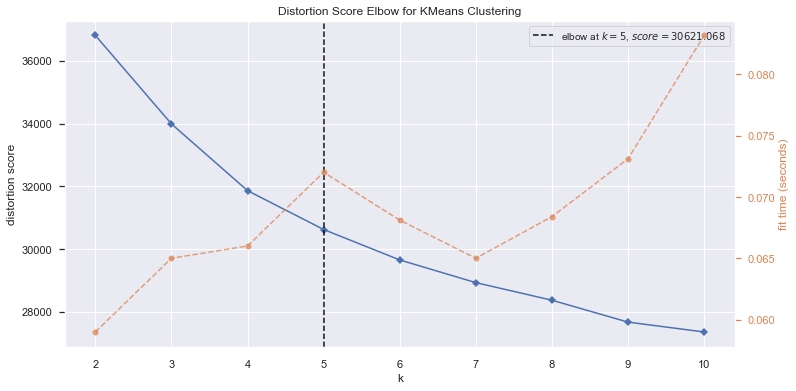

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:

model = KElbowVisualizer(KMeans(), k=10)
model.fit(unsupervised_data)
model.show()

ideal k = 5

### Fitting data into KMeans, k=5

In [62]:
ideal = KMeans(n_clusters=5)
ideal.fit(unsupervised_data)

KMeans(n_clusters=5)

In [63]:
unique, counts = np.unique(kmeans_4.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{0: 104, 1: 81, 2: 83, 3: 36}
